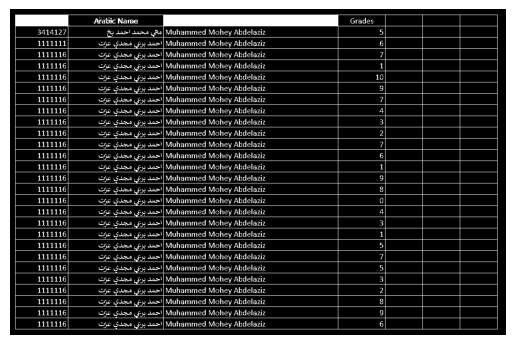

In [1]:
# import libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'gray'

# read image
img = cv.imread('./Assets/Input.jpg', 0)

# thresholding 
(thresh, binaryImg) = cv.threshold(img, 128, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
binaryImg = 255 - binaryImg 
cv.imwrite("Outputs/Binary_img.jpg", binaryImg)
plt.axis('off')
plt.imshow(binaryImg);

In [2]:
def getLines(x):
    global horizontalLinesImg, verticalLinesImg, kernel
    
    # Kernel Length
    kernelLength = np.array(img).shape[1] // x

    # Vertical Kernel (1 x kernelLength)
    verticalKernel = cv.getStructuringElement(cv.MORPH_RECT, (1, kernelLength))
    
    # Horizontal Kernel (kernelLength x 1)
    horizontalKernel = cv.getStructuringElement(cv.MORPH_RECT, (kernelLength, 1))
    
    # Apply erosion then dilation to detect vertical lines using the vertical kernel
    erodedImg = cv.erode(binaryImg, verticalKernel, iterations = 3)
    verticalLinesImg = cv.dilate(erodedImg, verticalKernel, iterations = 3)
    cv.imwrite("Outputs/vertical_lines.jpg", verticalLinesImg)
    
    # Apply erosion then dilation to detect horizontal lines using the horizontal kernel
    erodedImg = cv.erode(binaryImg, horizontalKernel, iterations = 3)
    horizontalLinesImg = cv.dilate(erodedImg, horizontalKernel, iterations = 3)
    cv.imwrite("Outputs/horizontal_lines.jpg", horizontalLinesImg)
    
    plt.subplot(1, 2, 1)
    plt.imshow(verticalLinesImg)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(horizontalLinesImg)
    plt.axis('off')

# interact(getLines, x=widgets.IntSlider(min=1, max=255, step=1, value=7));

In [3]:
def getIntersections(pixels):
    intersections = []
    for i in range(pixels.shape[0]):
        for j in range(pixels.shape[1]):
            if pixels[i][j] != 0:
               intersections.append((i, j))
    return intersections

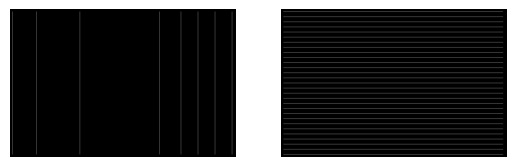

In [4]:
# Get Vertical & Horizontal Lines
getLines(x = 7)

[(12, 11), (12, 124), (12, 328), (12, 702), (12, 803), (12, 883), (12, 963), (12, 1043), (36, 11), (36, 124), (36, 328), (36, 702), (36, 803), (36, 883), (36, 963), (36, 1043), (60, 11), (60, 124), (60, 328), (60, 702), (60, 803), (60, 883), (60, 963), (60, 1043), (84, 11), (84, 124), (84, 328), (84, 702), (84, 803), (84, 883), (84, 963), (84, 1043), (108, 11), (108, 124), (108, 328), (108, 702), (108, 803), (108, 883), (108, 963), (108, 1043), (132, 11), (132, 124), (132, 328), (132, 702), (132, 803), (132, 883), (132, 963), (132, 1043), (156, 11), (156, 124), (156, 328), (156, 702), (156, 803), (156, 883), (156, 963), (156, 1043), (180, 11), (180, 124), (180, 328), (180, 702), (180, 803), (180, 883), (180, 963), (180, 1043), (204, 11), (204, 124), (204, 328), (204, 702), (204, 803), (204, 883), (204, 963), (204, 1043), (228, 11), (228, 124), (228, 328), (228, 702), (228, 803), (228, 883), (228, 963), (228, 1043), (252, 11), (252, 124), (252, 328), (252, 702), (252, 803), (252, 883), 

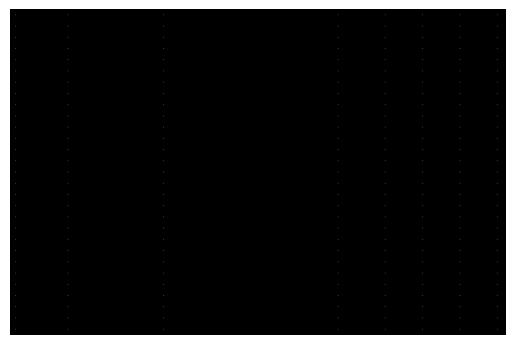

In [5]:
# Get vertices by ANDing the vertical and horizontal lines
res = cv.bitwise_and(verticalLinesImg, horizontalLinesImg)
cv.imwrite("Outputs/intersections.jpg", res)
plt.imshow(res)
plt.axis('off')

# Print positions of each intersection
print(getIntersections(res))

